In [1]:
#importing libraries

##necessary data processing and plotting tools
import numpy as np
import pandas as pd
import matplotlib.pylab as plt #data plotting
import seaborn as sns
    
##tensorflow tools for layering data processing  
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout, Dense, Activation
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential


## sklearn for machine learning tools and scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

#plot parameters according to my preferences
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use("Solarize_Light2")

2023-03-28 13:23:27.263514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 13:23:27.497830: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-28 13:23:27.540222: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 13:23:27.540254: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

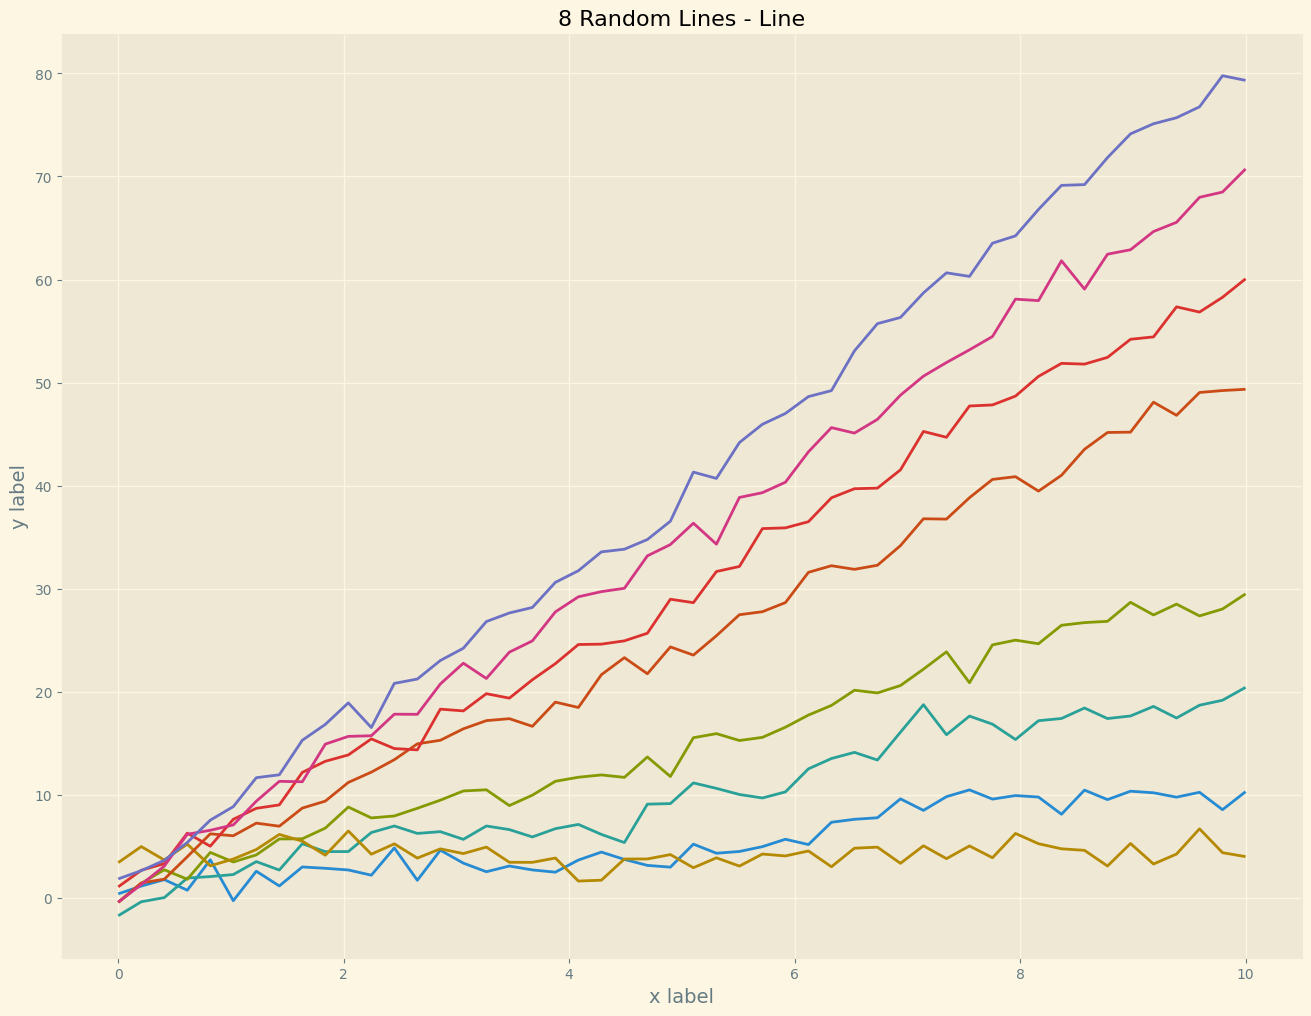

In [2]:
## sample code plot testing

np.random.seed(19692673)

x = np.linspace(0, 10)
with plt.style.context('Solarize_Light2'):
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 3 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 4 + np.random.randn(50))
    plt.plot(x, np.sin(x) + 5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 6 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 7 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 8 * x + np.random.randn(50))
    # Number of accent colors in the color scheme
    plt.title('8 Random Lines - Line')
    plt.xlabel('x label', fontsize=14)
    plt.ylabel('y label', fontsize=14)

plt.show()

In [3]:
# reading in data

df0 = pd.read_csv("/home/endorias/Documents/0.csv", header=None) 
df1 = pd.read_csv("/home/endorias/Documents/1.csv", header=None) 
df2 = pd.read_csv("/home/endorias/Documents/2.csv", header=None) 
df3 = pd.read_csv("/home/endorias/Documents/3.csv", header=None) 
df = pd.concat([df0, df1, df2, df3])

df.head() 

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


Gestures:

rock     == 0
scissors == 1
paper    == 2
ok       == 3

In [4]:
#labeling data
x_axis = df.loc[:,0:63] #EMG raw values as the X axis
y_axis = df[64] #Classification data as mentioned in above markdown

In [5]:
print(y_axis.shape)
print(x_axis)

(11678,)
        0    1    2    3     4     5      6     7     8    9   ...     54  \
0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ...   21.0   
1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -105.0   
2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -128.0   
3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ...  -54.0   
4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...   60.0   
...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...    ...   
2917  -3.0 -1.0 -1.0 -1.0 -28.0  20.0    5.0   0.0  -5.0  0.0  ...   -3.0   
2918 -13.0 -5.0 -4.0 -3.0  -4.0 -24.0  -10.0  -8.0  20.0  9.0  ...    5.0   
2919  -1.0 -3.0 -1.0  1.0  30.0  38.0   -1.0  36.0 -10.0  1.0  ...   12.0   
2920   1.0  4.0  4.0  5.0   9.0 -10.0    4.0   1.0  -2.0 -1.0  ...   -2.0   
2921  -2.0  4.0  2.0 -4.0  12.0   3.0   -2.0   9.0  -8.0 -2.0  ...  -10.0   

        55    56   57   58    59    60    61     62    63  
0    -

In [6]:
y_axis.unique()

array([0, 1, 2, 3])

In [7]:
x_array = np.array(x_axis)
y_array = np.array(y_axis)

scaling

In [8]:
##20% of data will be test set
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.20, random_state=101, stratify=y_array)

In [9]:
x_train = x_train.reshape(x_train.shape[0]*x_train.shape[1], 1) #m x n matrix --> column vector
x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1], 1)
#x.shape[0] = number of rows in x
#x.shape[1] = number of columns in x 

sc = StandardScaler() #select the scaler
x_train = sc.fit_transform(x_train) #fit and transform x_train
x_test = sc.transform(x_test) #transform x_test


In [10]:
x_train = x_train.reshape((-1, 8, 8))
x_test = x_test.reshape((-1, 8, 8))

print("Training set size")
print(x_train.shape)
print("Test set size")
print(x_test.shape)

Training set size
(9342, 8, 8)
Test set size
(2336, 8, 8)


In [11]:
y_train_categorical = np.eye(np.max(y_train) + 1)[y_train]

In [12]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2)) #dropout rate = 20%

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 64))
model.add(Dense(units = 128))

model.add(Dense(units = 4, activation="softmax")) #4 as the output classes
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

2023-03-28 13:23:29.847046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 13:23:29.847695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 13:23:29.847762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-28 13:23:29.847805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-28 13:23:29.847847: W tensorflow/c

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 8, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [15]:
history=model.fit(x_train, y_train_categorical, epochs = 250, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)

Epoch 1/250
234/234 - 9s - loss: 0.8101 - accuracy: 0.6047 - val_loss: 0.4885 - val_accuracy: 0.7512 - 9s/epoch - 39ms/step
Epoch 2/250
234/234 - 3s - loss: 0.3958 - accuracy: 0.8404 - val_loss: 0.2676 - val_accuracy: 0.9010 - 3s/epoch - 12ms/step
Epoch 3/250
234/234 - 3s - loss: 0.2230 - accuracy: 0.9279 - val_loss: 0.1957 - val_accuracy: 0.9406 - 3s/epoch - 12ms/step
Epoch 4/250
234/234 - 4s - loss: 0.1676 - accuracy: 0.9461 - val_loss: 0.1284 - val_accuracy: 0.9572 - 4s/epoch - 17ms/step
Epoch 5/250
234/234 - 4s - loss: 0.1431 - accuracy: 0.9545 - val_loss: 0.1279 - val_accuracy: 0.9604 - 4s/epoch - 17ms/step
Epoch 6/250
234/234 - 4s - loss: 0.1259 - accuracy: 0.9612 - val_loss: 0.1467 - val_accuracy: 0.9551 - 4s/epoch - 16ms/step
Epoch 7/250
234/234 - 4s - loss: 0.1179 - accuracy: 0.9637 - val_loss: 0.1160 - val_accuracy: 0.9636 - 4s/epoch - 18ms/step
Epoch 8/250
234/234 - 4s - loss: 0.1079 - accuracy: 0.9639 - val_loss: 0.1089 - val_accuracy: 0.9647 - 4s/epoch - 17ms/step
Epoch 9/

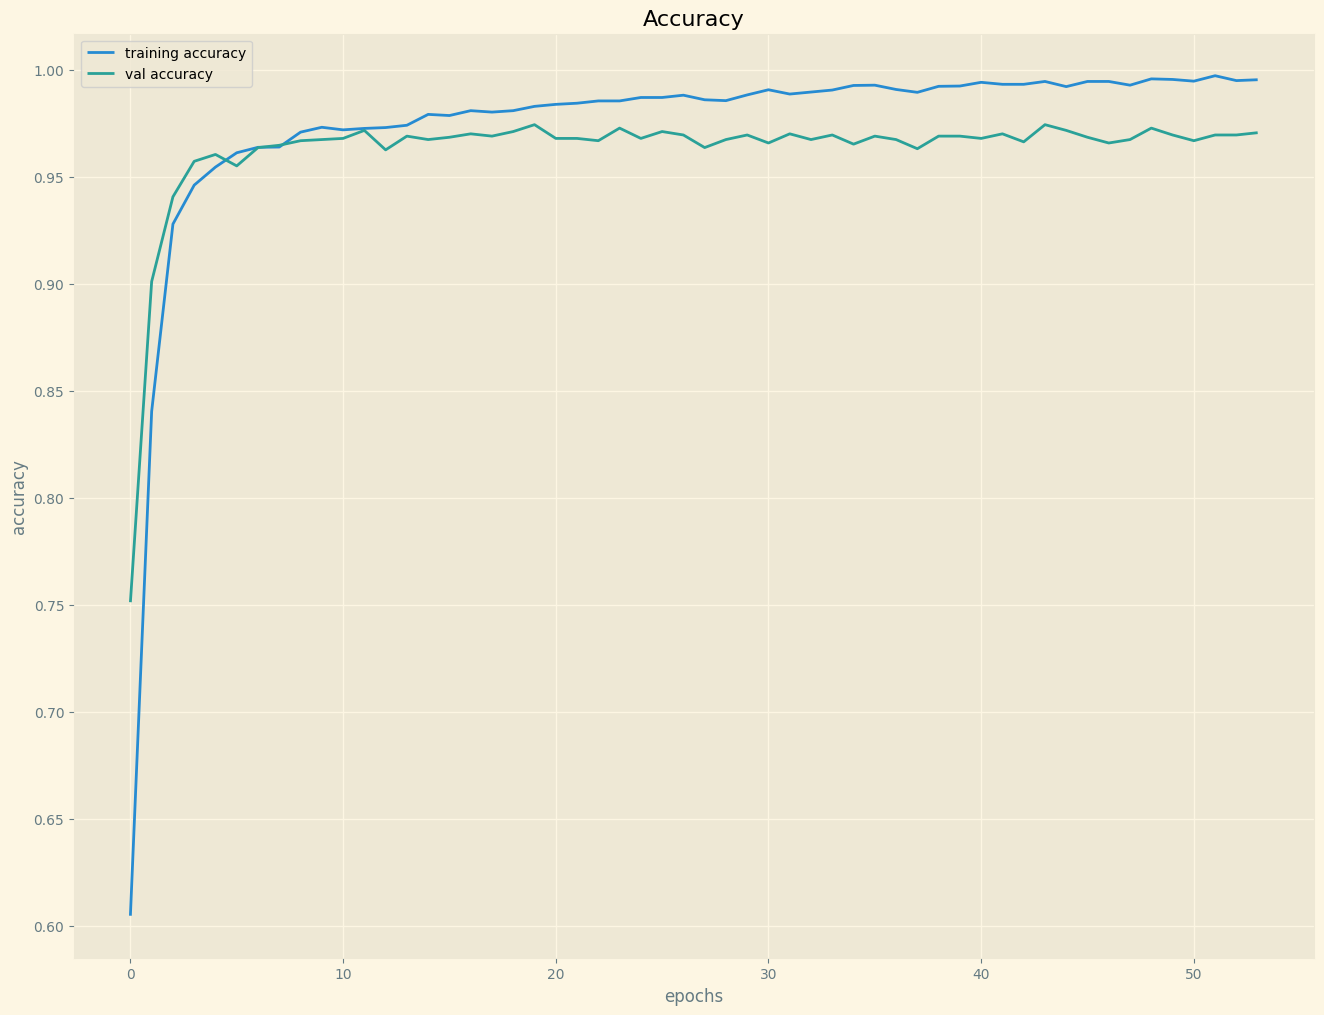

In [16]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

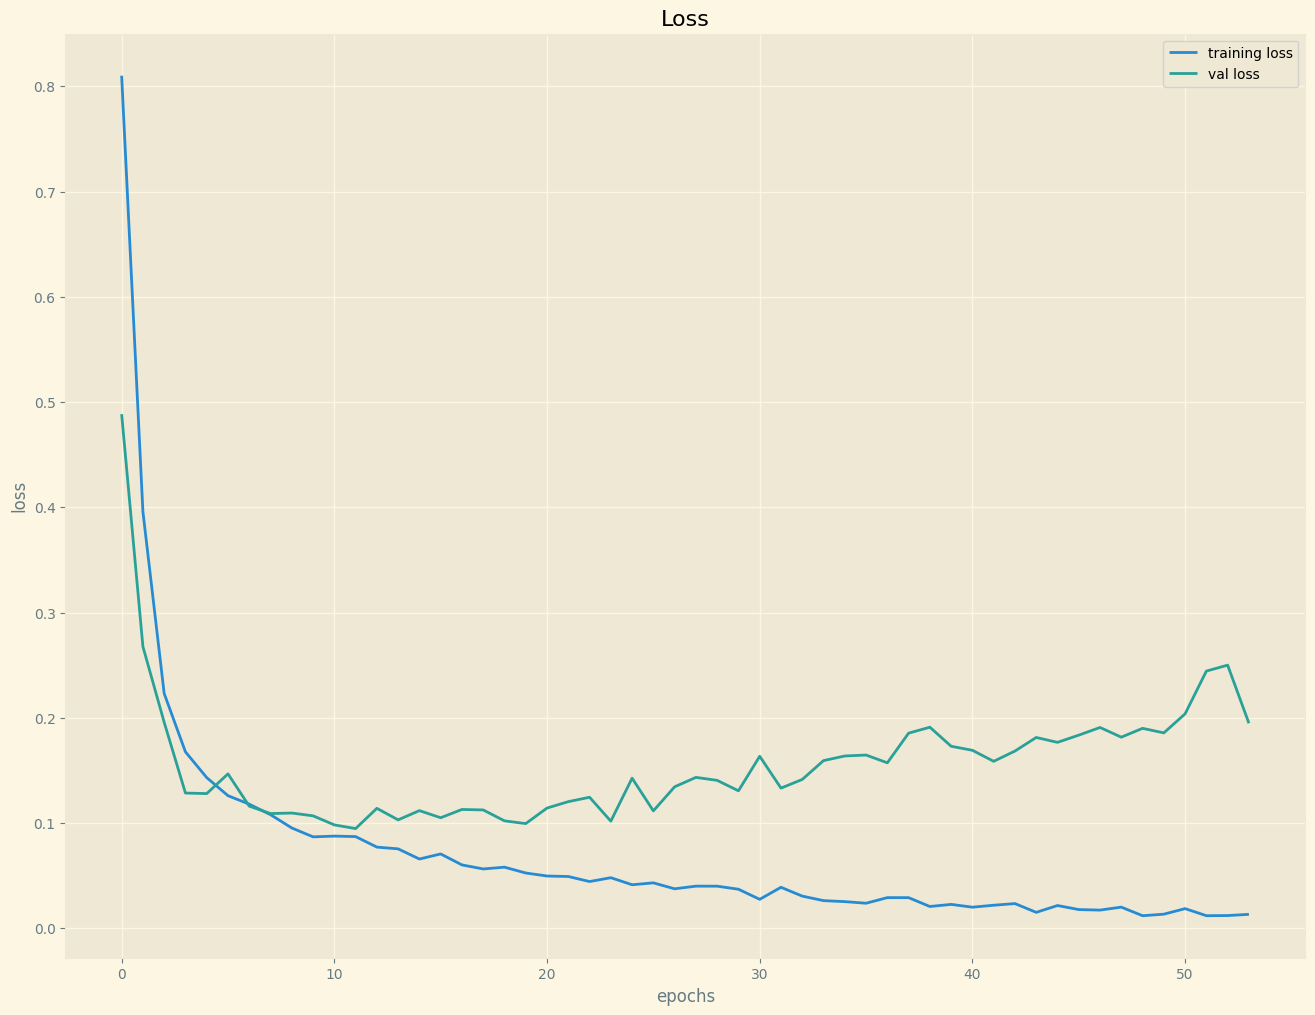

In [17]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

73/73 [==============================] - 1s 4ms/step
Recurrent NN accuracy: 0.9751712328767124


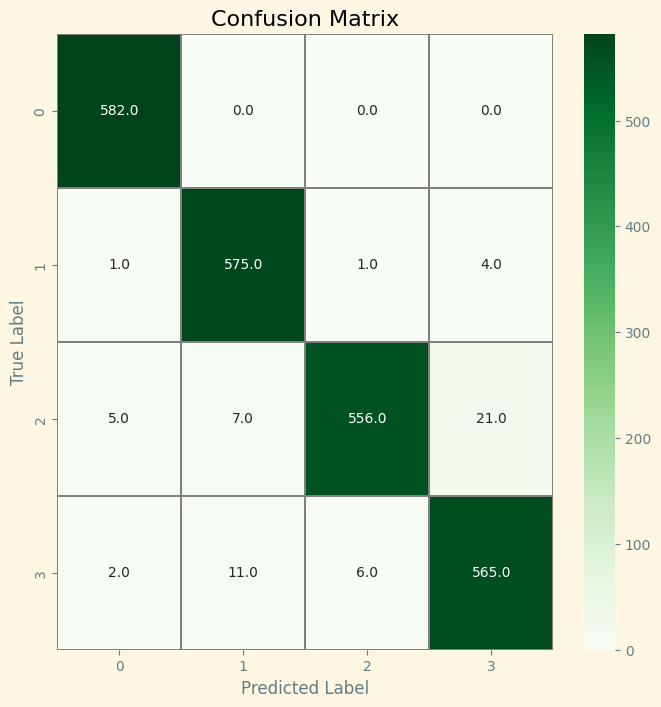

In [18]:
### Confusion Matrix


#calculate predictions
y_pred_categorical = model.predict(x_test) 
#convert one hot vectors to prediction classes
y_pred = np.argmax(y_pred_categorical,axis = 1) #returns the index of the max element of each row of Y_pred 
#-->returns values from 0 to 3

confusion_mtx = confusion_matrix(y_test, y_pred) 

#plot of the confusion matrix
#classification report
print("Recurrent NN accuracy:",metrics.accuracy_score(y_test, y_pred))

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [19]:
#classification report
print("Recurrent NN accuracy:",metrics.accuracy_score(y_test, y_pred))

Recurrent NN accuracy: 0.9751712328767124


In [20]:
#random forest classification
x_train_rf = np.empty((0,8)) #empty array of 8 columns
for i in range(0,x_train.shape[0]): #x_train.shape[0]
    matrix_8x8 = x_train[i]
    ch_means = matrix_8x8.mean(0) #mean for each channel in 8 timesteps
    x_train_rf = np.vstack((x_train_rf,ch_means)) 
print('X_train_rf size:')
print(x_train_rf.shape)

#mean extraction - test set
x_test_rf = np.empty((0,8)) #empty array of 8 columns
for i in range(0,x_test.shape[0]): 
    matrix_8x8 = x_test[i]
    ch_means = matrix_8x8.mean(0) #mean for each channel in 8 timesteps
    x_test_rf = np.vstack((x_test_rf,ch_means)) 
print('X_test_rf size:')
print(x_test_rf.shape)

X_train_rf size:
(9342, 8)
X_test_rf size:
(2336, 8)


In [21]:
y_train_rf = y_train
y_test_rf = y_test

print('y_train_rf size:')
print(y_train_rf.shape)
print('y_test_rf size:')
print(y_test_rf.shape)




y_train_rf size:
(9342,)
y_test_rf size:
(2336,)


In [22]:
#fit of the classifier to the training data
rf_model = RandomForestClassifier(n_estimators=100,random_state=44) 
rf_model.fit(x_train_rf, y_train_rf)

#predictions
y_pred_rf = rf_model.predict(x_test_rf)

RandomForestClassifier accuracy: 0.7110445205479452


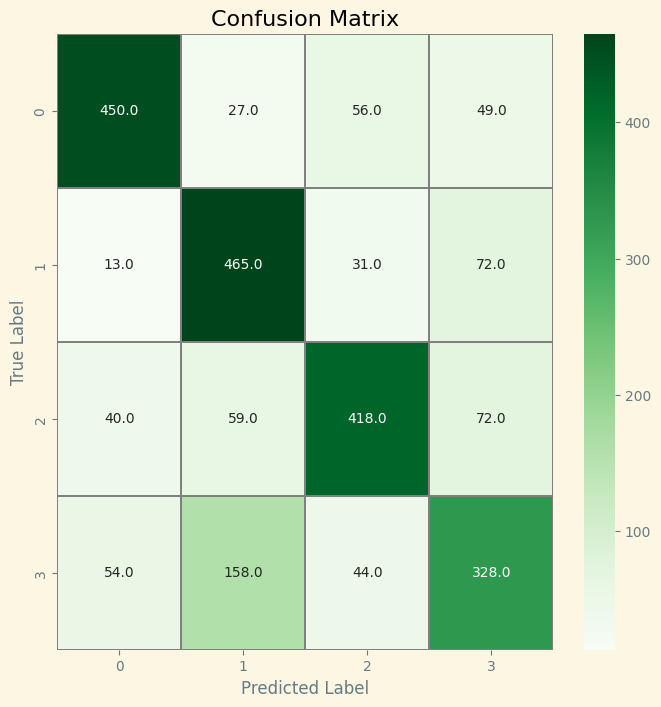

In [23]:
# Model Accuracy
print("RandomForestClassifier accuracy:",metrics.accuracy_score(y_test_rf, y_pred_rf))

#confusion matrix
confusion_mtx = confusion_matrix(y_test_rf, y_pred_rf) 
#plot
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [24]:
print('Classification report - Recurrent NN')
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------')
print('Classification report - Random Forest')
print(classification_report(y_test_rf, y_pred_rf))

Classification report - Recurrent NN
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       582
           1       0.97      0.99      0.98       581
           2       0.99      0.94      0.97       589
           3       0.96      0.97      0.96       584

    accuracy                           0.98      2336
   macro avg       0.98      0.98      0.98      2336
weighted avg       0.98      0.98      0.98      2336

--------------------------------------------------------
Classification report - Random Forest
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       582
           1       0.66      0.80      0.72       581
           2       0.76      0.71      0.73       589
           3       0.63      0.56      0.59       584

    accuracy                           0.71      2336
   macro avg       0.71      0.71      0.71      2336
weighted avg       0.71      0.71      0.71      2336